TEAM-NAME: Sudarshan_Rishabh

YOUR-ID: 2021701008 and 2021701030

YOUR-NAME: Sudarshan S Harithas and Rishabh Dev Yadav


# Assignment 4

Approximate time needed: 6-7 hours
    
## DLT and Epipolar Lines

The goal of this assignment is to aid your understanding of the Direct Linear Transform as well as Epipolar geometry.

For the first part of the assignment you will find correspondences between 2D-3D points and estimate the P Matrix. You will then be required to estimate Camera Parameters from this P matrix.

The second part of this assignment will require you to construct epipolar lines on two corresponding images.

The third part of this assignment will require you to use camera intrinsics to estimate the bounding box of a car.

---
### 4.1 Generating Correspondences
The first step to perform DLT is to generate correspondences. The cell below opens a new window. Clicking anywhere on the image should give you the pixel location of the image. Once you're done clicking, close the image window. The cell after displays the points you have clicked.

In [1]:
%matplotlib tk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import numpy as np

image_points = []
fig = plt.figure(figsize=(20,30))

img = mpimg.imread('q1/dlt1.jpeg')

def onclick(event):
    ix, iy = event.xdata, event.ydata
    image_points.append([ix, iy])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

imgplot = plt.imshow(img)
plt.show()

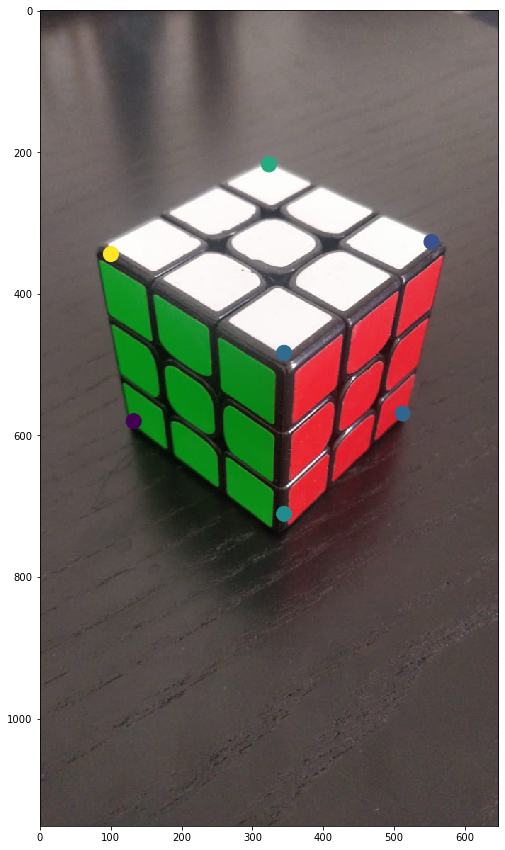

In [2]:
%matplotlib inline
N = len(image_points)
image_points = np.array(image_points)
fig = plt.figure(figsize=(10,15))

img=mpimg.imread('q1/dlt1.jpeg')
imgplot = plt.imshow(img)

colors = np.random.rand(N)
area = (15 * np.ones(N))**2 

plt.scatter(image_points[:,0], image_points[:,1], c=colors, s=area)
plt.show()

After generating pixel locations, you have to generate the corresponding world points. You have the freedom to chose which point you want as origin. You can consider each side as 4 units.

Ensure that the ordering of your points matches the ordering of image points. Keep track of the sequence of corners clicked.

In [3]:
image_points =  np.array([[128.26919385 ,  591.06009494] ,
 [341.77888744, 735.44794528],
 [516.887557   ,572.6276034 ],
 [ 83.72400597 ,343.7575002 ],
 [340.24284648 ,500.43367823],
 [569.11294968 ,339.14937732],
 [318.73827302, 220.87422331]])

world_3d_points = np.array([[0 , 0 , 0 ],
                            [4 , 0 , 0 ], 
                            [4 , 4 , 0 ],
                            [0 , 0 , 4 ],
                            [4 , 0 , 4 ],
                            [4 , 4 , 4 ],  
                            [0 , 4 , 4 ]] )

Now that we have the correspondences, we can estimate the P matrix. Implement the DLT function that returns the P matrix

Quick recap: x_i = P * X_i where (x_i, X_i) is the ith correspondence, and P is a 3x4 dimensional matrix. P is further decomposed as P = K * [ R | T].


In [4]:
def getax( image_pt , world_pt ):
    Ax = np.array( [  -world_pt[0] , -world_pt[1] , -world_pt[2] , -1 ,
                   0 , 0 , 0 , 0 , 
                  image_pt[0]*world_pt[0] , image_pt[0]*world_pt[1] , image_pt[0]*world_pt[2] , image_pt[0] ] )
    return Ax

In [5]:
def getay( image_pt , world_pt ):
    Ay = np.array( [ 0 ,0 ,0 ,0 , 
                    -world_pt[0] , -world_pt[1] , -world_pt[2] , -1 , 
                 image_pt[1]*world_pt[0] , image_pt[1]*world_pt[1] , image_pt[1]*world_pt[2] , image_pt[1]  ])
    return Ay

In [6]:
def ComputeM(image_points , world_3d_points  ):
    numPts = np.shape( world_3d_points)[0]
    row_num = 0 
    M = np.zeros( ( 2*numPts , 12  ) )
    
    for i in range( numPts):
        
        Ax = getax( image_points[i] , world_3d_points[i] )
        M[row_num, : ] = Ax
        row_num +=1
        Ay = getay( image_points[i] , world_3d_points[i]  )
        M[row_num, : ] = Ay
        row_num +=1
    return M

In [7]:
def DLT(  image_points , world_3d_points ):
    M = ComputeM(image_points , world_3d_points  )
    u, s, vt = np.linalg.svd(M)
    vt = vt.T
    P =  vt[: , 11] 
#     print(P/ P[-1])
    P = np.reshape( P , ( 3,4) )
    return P

In [8]:
P = DLT(image_points , world_3d_points )
P = P/P[-1 , -1 ]
print(P)

[[ 4.46412472e+01  5.83127731e+01 -1.61655644e+01  1.29439158e+02]
 [ 1.95364187e+01 -1.72403179e+01 -7.87702129e+01  5.90041651e+02]
 [-2.28395525e-02  3.39517057e-02 -5.08029808e-02  1.00000000e+00]]


### Theory

- Explain how DLT is implemented and show why it works (proof)
- When does DLT fail?

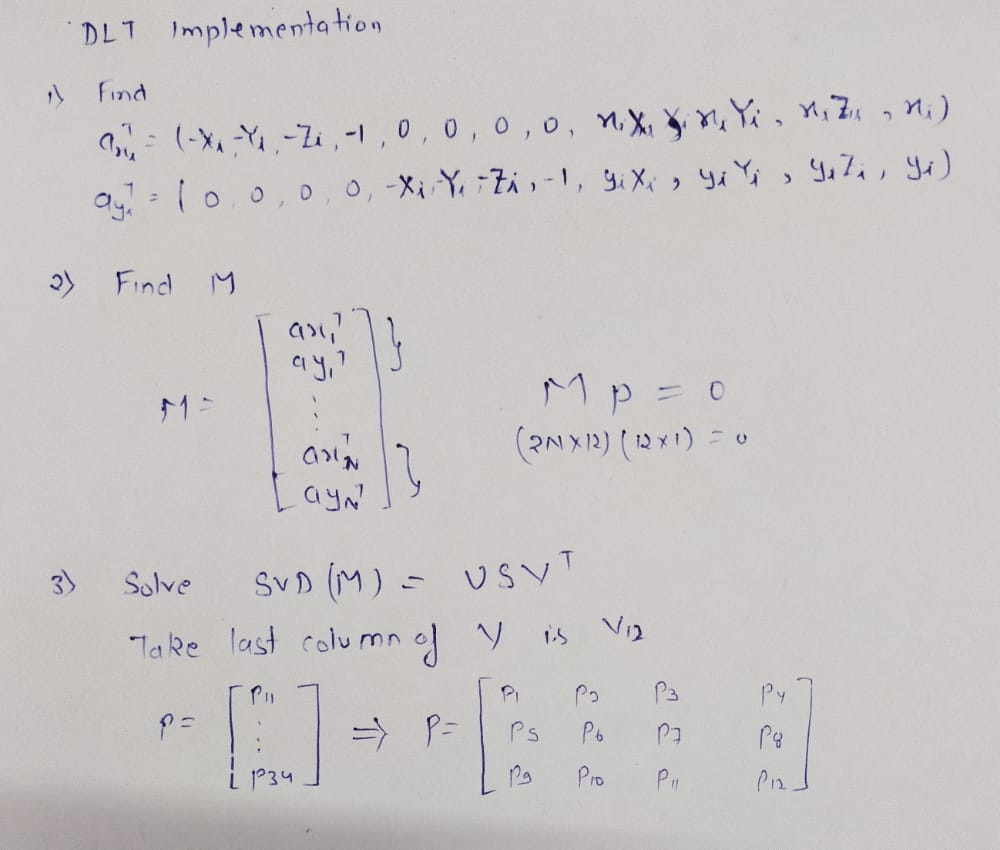

In [9]:
from IPython.display import Image
Image(filename='page1.jpeg') 

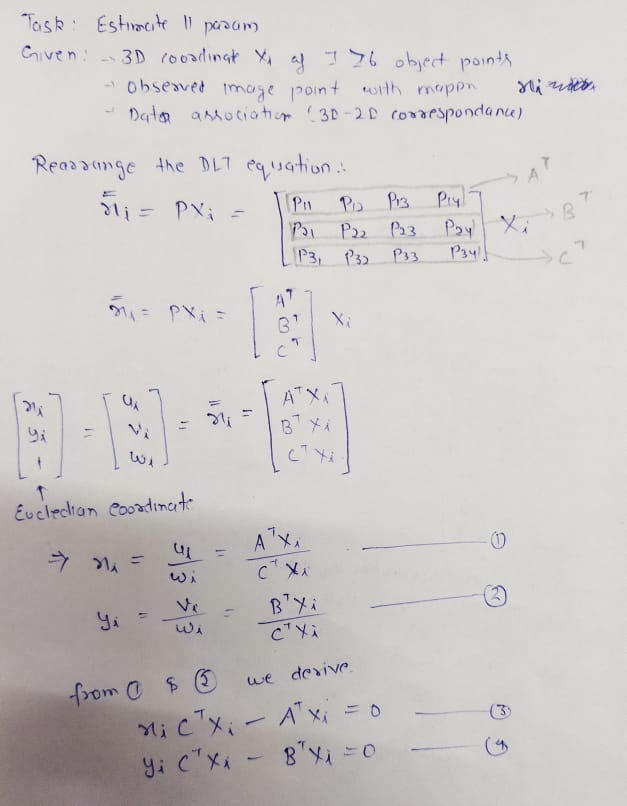

In [10]:

Image(filename='proof1.jpeg')



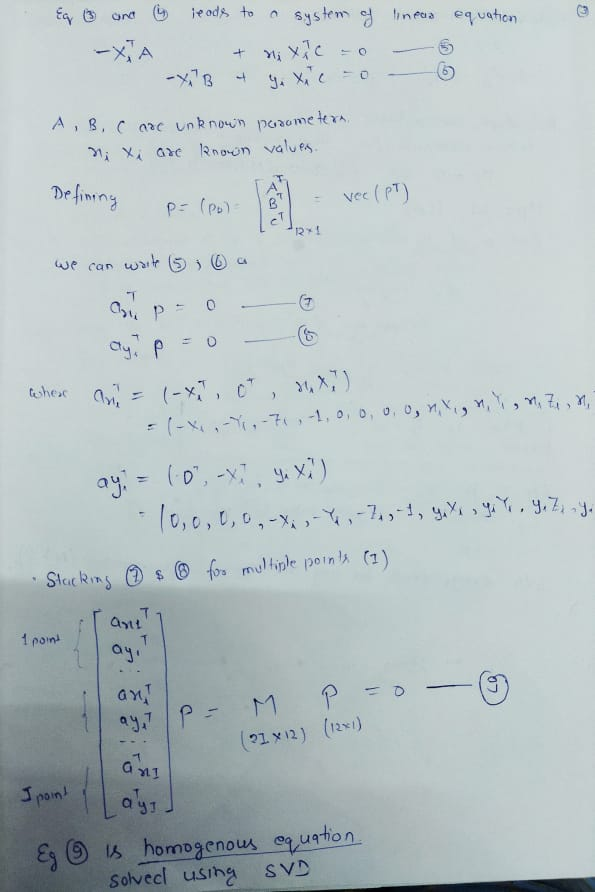

In [11]:
Image(filename='proof2.jpeg')



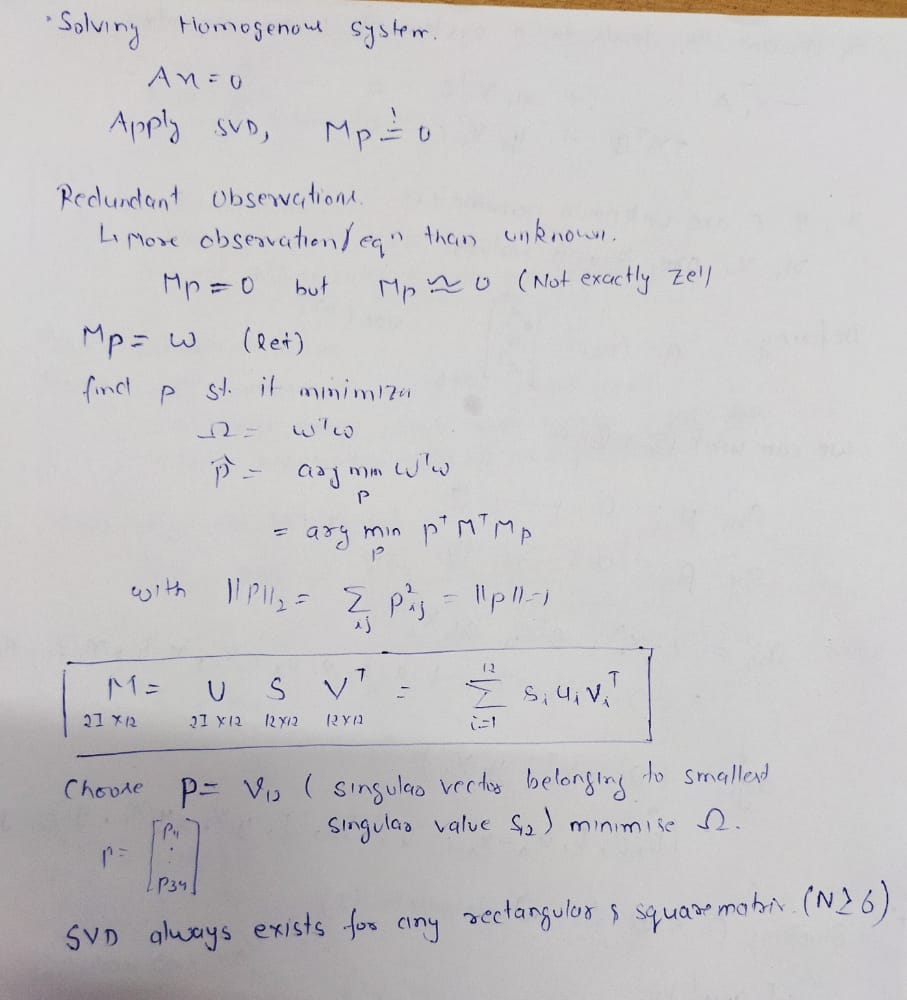

In [12]:
Image(filename='proof3.jpeg')


#### Why does DLT work ?  

As we can observe in the above proof, we are required to solve a system of homogeneous equations i.e. we are expected to detemine a vector in the null space of the matrix $M$. An SVD decomposition of a matrix leads to two matrices $U$ and $V^{T}$ that are orthogonal and whose coloumns form an orthonormal set, the matrix $D$ is a diagonal matrix which has eigen values arranged in the decreasing order. 

Since we are choosing the last row or coloumn ( considering either $V$ or $V^{T}$) we are choosing a vector that corresponds to the least eigen value and this is guaranteed to reduce and to provide the best solution for the homogeneous system that will reduce the error. 



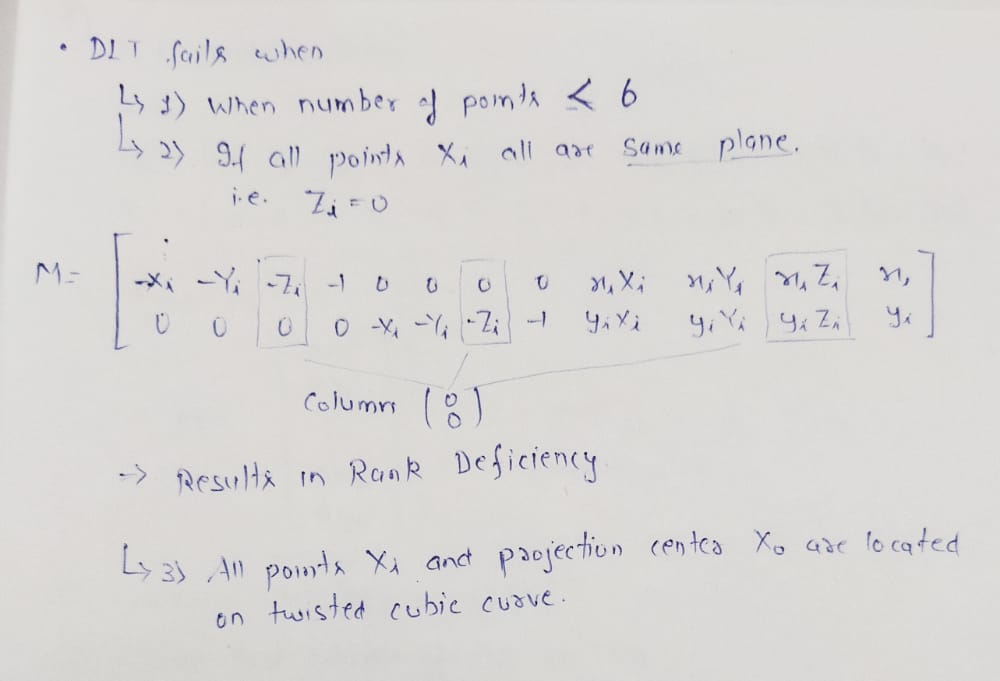

In [13]:

Image(filename='page2.jpeg')

## Analysing P

The next part of this question is to analyse how good our estimate is. Report the reprojection error of your P matrix

In [14]:
def GetHomogeneousCoordinates( X ):
    numPts = np.shape(X)[0]
    ones = np.ones( ( numPts , 1) )
    X_homogeneous = np.append( X, ones , axis =1 )
    
    return X_homogeneous

In [15]:
X = GetHomogeneousCoordinates(world_3d_points)
print(X.T)

[[0. 4. 4. 0. 4. 4. 0.]
 [0. 0. 4. 0. 0. 4. 4.]
 [0. 0. 0. 4. 4. 4. 4.]
 [1. 1. 1. 1. 1. 1. 1.]]


In [16]:
#Get reprojected points
def get_points(P, X):
    image_coordinates = P@(X.T)
    image_coordinates = image_coordinates/image_coordinates[2] 
    
    return image_coordinates

#Get reprojection error
def get_err(x_given , x_predicted):
    diff = x_given - x_predicted
    numPts = np.shape(x_given)[0]
    diff = (0.5/numPts)*np.sum( np.square(diff ) )
    
    return diff

In [17]:
image_coordinates = get_points(P , X )
error = get_err(image_points , image_coordinates[0:2 , :].T )

In [18]:
print("Reprojection Error is:", get_err(image_points , image_coordinates[0:2 , :].T ))

Reprojection Error is: 3.7405653784331876


Given the P matrix, we can estimate K, R and T. Write a function that returns K,R,T given P.
Note: 
P = K * [R | T] where K is a 3x3 matrix and [R | T], P are 3x4 matrices

In [19]:
def ret_RKT(P):
    H = P[0:3 , 0:3]
    h = P[: , 3]
    H_inv = np.linalg.inv(H)
    X0 = -np.linalg.inv(H)@h
    Q, R = np.linalg.qr(H_inv)
    K =  np.linalg.inv( R)
    K  = K/K[2,2] 
    Rotation = Q.T
    T = (Rotation@X0)
    
    return -Rotation , K , T 
    
R, K, T = ret_RKT(P)

#### Verifying the R, K, T Values

Use `np.isclose` to verify the matrix

In [20]:
H = np.zeros( ( 3, 4) )
H[0 : 3, 0:3 ]=R
H[: , 3] = T
P1 = K@H
P1 = P1/P1[-1][-1]
print(P1)
P_estimate = P
np.isclose( P1, P_estimate )

[[ 4.46412472e+01  5.83127731e+01 -1.61655644e+01  1.29439158e+02]
 [ 1.95364187e+01 -1.72403179e+01 -7.87702129e+01  5.90041651e+02]
 [-2.28395525e-02  3.39517057e-02 -5.08029808e-02  1.00000000e+00]]


array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

**Reproject the world points with P matrix you have obtained via DLT and visualize**

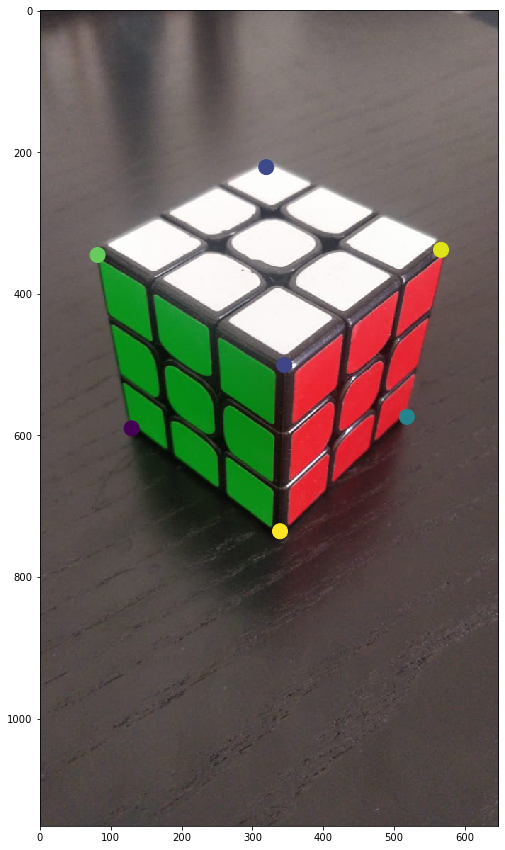

In [21]:
WorldPts = X.T

ImagePts = P_estimate@WorldPts
ImagePts = ImagePts/ ImagePts[-1]

fig = plt.figure(figsize=(10,15))

ImagePts = ImagePts.T
img=mpimg.imread('q1/dlt1.jpeg')
imgplot = plt.imshow(img)

colors = np.random.rand(N)
area = (15 * np.ones(N))**2 

plt.scatter(ImagePts[:,0], ImagePts[:,1], c=colors, s=area)
plt.show()

### Zhangs method

For this task, use the inbuilt Opencv function to estimate the K matrix of a camera. Use the checkerboard images 5456-5470 in `q1/zhangs` folder for this task. Familiarize yourself with the different parameters for this method.

**Reference**: https://docs.opencv.org/3.4/dc/dbb/tutorial_py_calibration.html

In [22]:
import glob
import os
import cv2 

image_folder_base_path = 'q1/Zhangs'
images = sorted(os.listdir( image_folder_base_path))
world_3d_points = np.zeros((6*8,3), np.float32) # points per plane  in 1 image
world_3d_points[:,:2] = np.mgrid[0:6,0:8].T.reshape(-1,2)
world_3d_points_list  = []
corresponding_pixel_points_list = []

for img_name in images:
    
    image_full_path = os.path.join( image_folder_base_path , img_name)
    img_gray = cv2.imread( image_full_path , 1)
    img_gray = cv2.cvtColor(img_gray, cv2.COLOR_BGR2GRAY)
    img = cv2.imread(image_full_path , 1 )
    ret, corners = cv2.findChessboardCorners(img_gray, (6,8), None)
    
    if ret == True:
        
        world_3d_points_list.append(world_3d_points )
        corresponding_pixel_points_list.append(corners)
#         cv2.drawChessboardCorners(img, (7,6), corners, ret)
#         plt.imshow(img)
#         plt.show()
        

In [23]:
# print( img_gray.shape[::-1])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(world_3d_points_list, corresponding_pixel_points_list, img_gray.shape[::-1], None, None)
print(mtx)

[[1.36634770e+04 0.00000000e+00 3.33653557e+03]
 [0.00000000e+00 1.36813826e+04 1.49660054e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


---
### 4.2 Epipolar lines
#### Task 1

For this task, you have been given two images of the same scene taken from different view-points. You should first estimate the fundamental matrix from these two images.

<img src="./q2/img1.jpg" alt="image 1" width="400"/>
<img src="./q2/img2.jpg" alt="image 2" width="400"/>


Recall that given a point in one image, it's corresponding location in the other image can be found to along a line viz. the epipolar line. The task given to you is to draw the epipolar lines in the second image for each given point in the first image. You have to repeat this for the other image as well. Draw epipolar lines on the first image for the corresponding points in the second image.

The convention used for F is $x'^{T}Fx$ where $x'$ is the location of the point in the second image. For this question you will need to compute the F matrix on your own without using inbuilt functions. 

### Overview of  Methodology 

1. Extract feature points and determine 2D 2D correspondance between images. 
2. Implement the 8 point algorithm to determine the Fundamental matrix 
3. Draw epipolar line using the fundamental matrix. 

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import numpy as np

import cv2

img1 = cv2.imread('q2/img1.jpg',0) # queryImage
img2 = cv2.imread('q2/img2.jpg',0) # trainImage

img_shape = np.shape(img1)

x_max , y_max = img_shape[0] , img_shape[1]

print( x_max , y_max)
T = np.array( [ [ 1/ x_max , 0 , -1/2    ] , 
                  [  0 , 1/y_max   ,  -1/2  ] ] )
orb = cv2.SIFT_create()

kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

good = []
Image1_feature_points =[]
Image2_feature_points = []
pts1 = []
pts2 = []

for m,n in matches:
    if m.distance < 0.6*n.distance:
        good.append([m])
        img1_idx = m.queryIdx
        img2_idx = m.trainIdx
        
        (x1, y1) = kp1[img1_idx].pt
        (x2, y2) = kp2[img2_idx].pt
        
        Image1_feature_points.append( (x1, y1) )
        Image2_feature_points.append(  (x2, y2) )
        pts1.append( kp1[img1_idx].pt )
        pts2.append( kp2[img2_idx].pt  )   

print( len(good))

720 1280
374


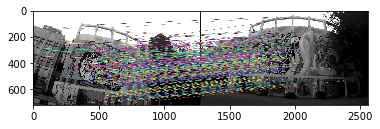

(<matplotlib.image.AxesImage at 0x7f96d8aebb20>, None)

In [25]:
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None , flags=2 )
plt.imshow(img3),plt.show()

In [26]:
def GetScalingParams(Image1_feature_points , Image2_feature_points  ):
    #https://www.cc.gatech.edu/classes/AY2016/cs4476_fall/results/proj3/html/sdai30/index.html
    pt1_mean = np.mean(Image1_feature_points, axis =0 )
    pt2_mean = np.mean(Image2_feature_points, axis =0 )
    
    numPts = np.shape(Image1_feature_points)[0]
    
    factor1 =0 
    factor2 = 0
    
    for i in range( numPts):
        factor1 += np.linalg.norm(Image1_feature_points[i] - pt1_mean )**2
        factor2 += np.linalg.norm(Image2_feature_points[i] - pt2_mean )**2
    
    val1 = 1.414 / (((1/numPts)*factor1)**(1/2))
    val2 = 1.414 /(((1/numPts)*factor2)**(1/2))
    
    pt1_matrix1 = np.array([[val1,  0  , 0],
                            [ 0  , val1, 0],
                            [ 0  ,   0 , 1]])
    
    pt2_matrix1 = np.array([[val2,  0  , 0],
                            [  0 , val2, 0],
                            [  0 ,  0  , 1]])   
    
    pt1_matrix2 = np.array([[  1 , 0 , -pt1_mean[0]  ]  ,
                            [ 0, 1, -pt1_mean[1] ] ,
                            [ 0 , 0 , 1 ]  ] )

    pt2_matrix2 = np.array([[  1 , 0 , -pt2_mean[0]  ]  ,
                            [ 0, 1, -pt2_mean[1] ] ,
                            [ 0 , 0 , 1 ]  ] )
    
    T1 = pt1_matrix1@pt1_matrix2
    T2 = pt2_matrix1@pt2_matrix2
    
    return T1 , T2

In [27]:
T1 , T2 = GetScalingParams(Image1_feature_points , Image2_feature_points  )

In [28]:
def NormalizeCoordinates(Image1_feature_points ,Image2_feature_points  ):
    
    Normalized_Image1_points = []
    Normalized_Image2_points = []
    
    numPts = np.shape(Image1_feature_points)[0]
    
    pt1 = np.ones( (3, 1) )
    pt2 = np.ones( (3, 1) )

    for i in range( numPts ):
        
        pt1[0][0] = Image1_feature_points[i][0]
        pt1[1][0] = Image1_feature_points[i][1]
        
        pt2[0][0] = Image2_feature_points[i][0]
        pt2[1][0] = Image2_feature_points[i][1]
        
        P1  = T1@pt1 
        P2 = T2@pt2
        
        ( x1, y1 ) = ( P1[0][0] , P1[1][0] )
        (x2, y2) = ( P2[0][0] , P2[1][0] )
        
        Normalized_Image1_points.append(  ( x1, y1 )  )
        Normalized_Image2_points.append( (x2, y2)  )
        
    return Normalized_Image1_points , Normalized_Image2_points

In [29]:
Normalized_Image1_points , Normalized_Image2_points = NormalizeCoordinates(Image1_feature_points ,Image2_feature_points  )

In [30]:
Normalized_Image1_points , Normalized_Image2_points = NormalizeCoordinates(Image1_feature_points ,Image2_feature_points  )

# print( Normalized_Image1_points)
print("-------------")
# print(Normalized_Image2_points )

-------------


In [31]:
def GetKorneckerProduct( Pt1 , Pt2 ): 
    
    Pt1_Homogeneous = np.ones( ( 3,1) )
    Pt2_Homogeneous = np.ones( ( 3,1) )
    
    Pt1_Homogeneous[0][0] = Pt1[0]
    Pt1_Homogeneous[1][0] = Pt1[1]
    
    Pt2_Homogeneous[0][0] = Pt2[0]
    Pt2_Homogeneous[1][0] = Pt2[1]    
    
    A_row = np.kron(Pt2_Homogeneous  , Pt1_Homogeneous )
    
    return A_row.T

In [32]:
def GenerateAMatrix( Normalized_Image1_points , Normalized_Image2_points  ):
    
    numPts = np.shape( Normalized_Image1_points)[0]
    A = np.zeros( ( numPts , 9) )
    
    for i in range( numPts ):
        
        A[ i , : ] = GetKorneckerProduct( Normalized_Image1_points[i] , Normalized_Image2_points[i]  )
    
    return A

In [33]:
A  = GenerateAMatrix(Normalized_Image1_points , Normalized_Image2_points  )
u, s, vt = np.linalg.svd( A )

In [34]:
V = vt[-1].reshape(( 3, 3 ))
F = np.reshape(V , ( 3, 3 ) )

u1, s1, vt1 = np.linalg.svd( F  )

s1[2] = 0
F = np.dot(u1, np.dot( np.diag(s1),vt1 ))

F = ((T2.T)@F@T1)
F = F/F[2, 2]

print(F)

[[-4.42743730e-06  1.38368152e-05 -2.16707105e-03]
 [-9.30481332e-06  3.46606476e-06 -3.35654512e-03]
 [ 2.64557650e-03 -1.96176005e-03  1.00000000e+00]]


In [35]:
## Verifying the obtained answer using the inbuilt functions in opencv 

F1, mask = cv2.findFundamentalMat( np.asarray(pts1) , np.asarray( pts2) ,cv2.FM_8POINT)

print(F1)

[[-4.36754933e-06  1.36432173e-05 -2.14619466e-03]
 [-9.13506314e-06  3.41480886e-06 -3.38138138e-03]
 [ 2.59161921e-03 -1.89195730e-03  1.00000000e+00]]


In [36]:
# select subset of points in either images 

numPts = 10
start = 20 

Pt1x = []
Pt1y  =[]

Pt2x  = []
Pt2y = []

Pt1 = np.ones( ( numPts,3 ) )
Pt2 = np.ones( ( numPts,3 ) )

count = 0 
for i in range(start , start +numPts ):

    Pt1[count][0] = Image1_feature_points[i][0]
    Pt1[count][1] = Image1_feature_points[i][1]
    
    Pt2[count][0] = Image2_feature_points[i][0]
    Pt2[count][1] = Image2_feature_points[i][1]
    
    count +=1


In [37]:
def GetLine( coeffs ):
    
    Y_axis =[]
    X_axis = []
    
    for u in range( x_max):
        
        val = ( coeffs[2] + coeffs[0]*u )/(coeffs[1])
        Y_axis.append(val)
        X_axis.append(u)

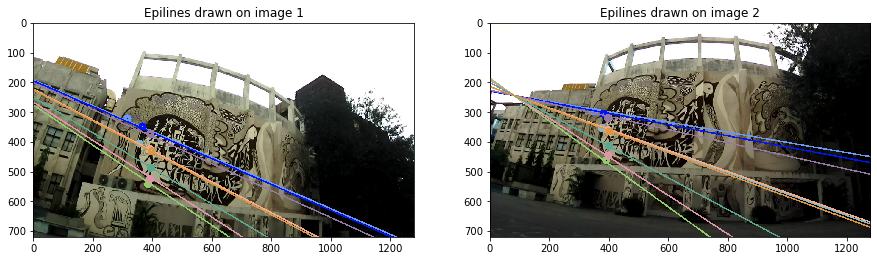

In [38]:
img1 = cv2.imread('q2/img1.jpg',1)          # queryImage
img2 = cv2.imread('q2/img2.jpg',1) # trainImage

lines1 = (F@Pt1.T).T
lines2 = (F.T@Pt2.T).T

def GetCoordinatesStart( r ):
    x, y =  map(int, [0, -r[2]/r[1] ])
    
    return x, y

def GetCoordinatesEnd( r , n):
    x1,y1 = map(int, [n, -(r[2]+r[0]*n)/r[1]])
    
    return x1 , y1


def GetLine( img  , lines ,pts ):
    np.random.seed(3)
    m,n,c = img.shape
    
    for r, pt1 in zip(lines, pts):
        
        pt1 = pt1.astype(np.int64)
        color = tuple(np.random.randint(0,255,3).tolist())
        x0 , y0 = GetCoordinatesStart( r )
        x1, y1 = GetCoordinatesEnd( r ,  n )
        img = cv2.line(img, (x0,y0), (x1,y1),color,3)
              
        cv2.circle(img, tuple(pt1),8,color,10)
    return img

img1_epilines = GetLine(img1,lines2,Pt1[:, 0:2] )
img2_epilines = GetLine(img2,lines1,Pt2[:, 0:2] )
    
fig, ax = plt.subplots(1,2,figsize = (15,5))
ax[0].imshow(img1_epilines)
ax[0].title.set_text('Epilines drawn on image 1')
ax[1].imshow(img2_epilines)
ax[1].title.set_text('Epilines drawn on image 2')

**Provide a clear explanation on your approach for both this task and the next**

#### Task 2
Report the location of the epipoles. Mathematically find the epipoles and verify that the lines intersect at the epipole.

In [39]:
# The epipoles exsist in the null space of the  matrix F and F^{T}  

from scipy.linalg import null_space

ns = null_space(F)
ns = ns * np.sign(ns[0,0])
print(" The epipole in Image 1")
print(ns/ns[-1])
print("---------")
ns = null_space(F.T)
ns = ns * np.sign(ns[0,0])
print(" Epipole in Image 2 ")
print(ns/ns[-1])

## the results can be visulally verified 

 The epipole in Image 1
[[-343.31206325]
 [  46.76498233]
 [   1.        ]]
---------
 Epipole in Image 2 
[[ 80.10419207]
 [246.20807876]
 [  1.        ]]


 We can use concepts from set theory to prove the following. Let The epipolar line (denoted by $l$) is formed by the intersection of the Image plane (denoted by $I$) and the Epipolar plane denoted by ( denoted by $E$ ). 


Consider the $n$ epiploar lines formed as given below 

$ l_{1} = I \cap E_{1} $  <br>
$ l_{2}  = I \cap E_{2} $  <br>
$ l_{3}  = I \cap E_{3} $ <br>
$ : $<br>
$ : $<br>

$ l_{n}  = I \cap E_{n} $ 

By definition of the epipolar plane consists of the camera origin $ X_{o1} and X_{o2}$  and the 3D point of intersection. 

Therefore  the camera origins belong to all the epipolar planes (in other words the epipolar axis is common to all the epipolar planes) <br>
$ X_{o1} and X_{o2} \in  \forall_{ i=0}^{n} E_{i} $  



The projection of the camera origin onto the opposite image plane is defined as the epipole, therfore the intersection of the epipolar axis, epipolar plane and image plane is the epipole. 


$ I_{j} \cap E_{i} \cap B = e_{j}$  (where $j$ denotes the $j^{th}$ image plane j can be right or the left image plane) 

We know that $ I_{j} \cap E_{i} = l_{j}^{i} $ (intersection of the $j^{th}$ image plane and the $i^{th}$ epipolar plane is the $l_{j}^{i} $ epipolar line). Substitute this relation in the previous equation we get 


Therefore  we can conclude that  $   l_{j}^{i} \cap B = e_{j} $ ( since the $B$ epiploar axis is fixed for all epipolar planes there will be one epipole per image) 

The epipolar axis $B$ is constant and there are multiple epipolar lines resulting in a common epipole. Since the epipoles are the only point that are common to all the epipolar lines and they lie on the epipolar line they are the point of intersection. 

____
### 4.3 Drawing a bounding box around a car and localizing it in the camera frame
You’ve been provided with an image, also taken from a self-driving car, that shows another car in front. The camera has been placed on top of the car, 1.65 m from the ground, and assume the image plane is perfectly perpendicular to the ground. K is provided to you. Your task is to draw a 3D-bounding box around the car in front as shown. Your approach should be to place eight points in the 3D world such that they surround all the corners of the car, then project them onto the image, and connect the projected image points using lines. You might have to apply a small 5° rotation about the vertical axis to align the box perfectly. Rough dimensions of the car - h: 1.38 m, w: 1.51, l: 4.10. (Hint: Fix a point on the ground as your world origin.). Also estimate the approximate translation vector to the mid-point of the two rear wheels of the car in the camera frame.

<!-- ![Kitti car](./q3/image.png) -->

### Methodology 

1. To determine: Draw a bounding box arround the car 
2. The world origin is placed on the ground near the left tyre of the car and the 3D locations of the neighbouring points are found relative to this origin considring the dimension of the car. 

3. The detail derivation is given in the Question4.3.pdf

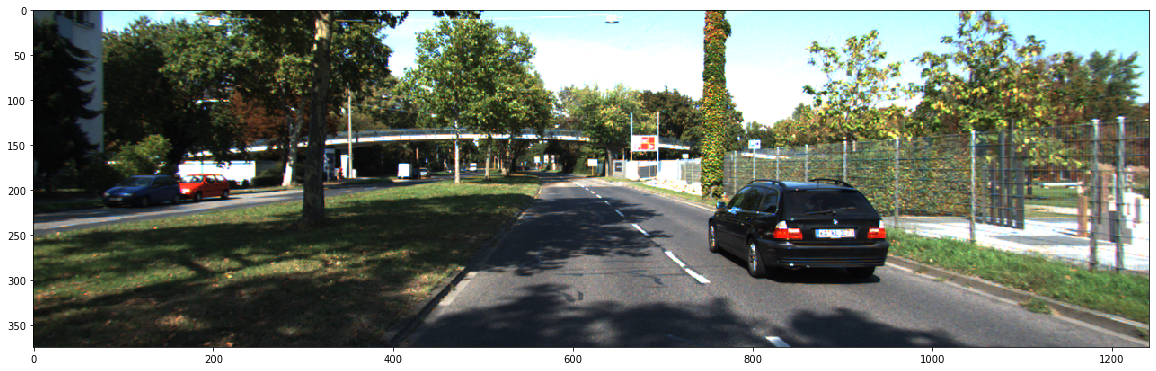

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import numpy as np

img = mpimg.imread('q3/image.png')
fig = plt.figure(figsize=(20,30))
imgplot = plt.imshow(img)
plt.show()

In [41]:
world_points = np.array([[  0  ,  0  ,  0  , 1] , 
                         [-1.51,  0  ,  0  , 1] , 
                         [  0  ,  0  , -4.1, 1] , 
                         [-1.51,  0  , -4.1, 1] , 
                         [  0  , 1.38,  0  , 1] , 
                         [-1.51, 1.38,  0  , 1] , 
                         [  0  , 1.38, -4.1, 1] , 
                         [-1.51, 1.38, -4.1, 1] ] ) 

                         
world_origin_image_frame = np.array( [ 806,297 , 1 ] ) 

k = np.array([[7.2153e+02,0,6.0955e+02],
              [0,7.2153e+02,1.7285e+02],
              [0,0,1]])
R = np.eye(3)
c = np.cos
s = np.sin
pi = np.pi 
theta = -pi*3/180

R = np.array( [ [ c(theta) , 0 , s(theta)  ] ,  ## apply a rotation of 5 degrees 
              [ 0 , 1 , 0]  , 
              [-s(theta) , 0 , c(theta) ] ] )


world_origin_camera_frame = (R.T)@np.linalg.inv(k)@(world_origin_image_frame.T)

In [42]:
tz  =  1.65/ world_origin_camera_frame[1]
tx = tz*world_origin_camera_frame[0]
ty = -1.65
# print(tx, tz)

H = np.zeros( ( 3, 4) )

H[0: 3, 0:3] = R
H[: , 3] = [ -tx  , -1.65 , -tz]

P = k@H

In [43]:
pixel_points = P@(world_points.T)

pixel_points = pixel_points / pixel_points[-1]
print(pixel_points)
pixel_points = pixel_points.T

[[843.49273461 954.11350401 762.17935879 840.35780464 843.49273461
  954.11350401 762.17935879 840.35780464]
 [297.         295.98522953 259.8525725  259.35299598 193.16545455
  192.9994012  187.08678459 187.00503571]
 [  1.           1.           1.           1.           1.
    1.           1.           1.        ]]


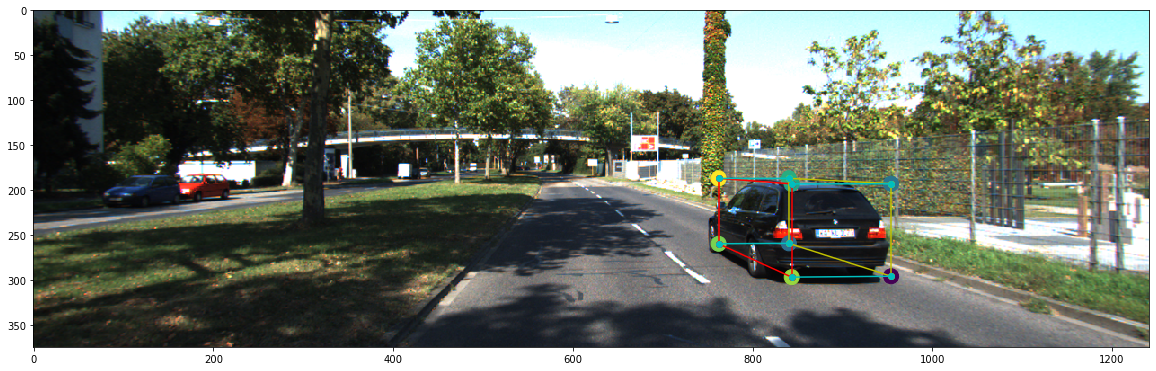

In [44]:
fig = plt.figure(figsize=(20,30))

imgplot = plt.imshow(img)
X_pts = []
Y_pts = []

for i in range( len(pixel_points) ):
    
    X_pts.append(pixel_points[i][0] )
    Y_pts.append(pixel_points[i][1] )

colors = np.random.rand(len(pixel_points))
area = (15 * np.ones(len(pixel_points)))**2

plt.scatter(X_pts, Y_pts, c=colors , s=area)

# print(X_pts, Y_pts)
plt.plot([X_pts[0],X_pts[4]],[Y_pts[0],Y_pts[4]], 'ro', linestyle="-")
plt.plot([X_pts[4],X_pts[6]],[Y_pts[4],Y_pts[6]], 'ro', linestyle="-")
plt.plot([X_pts[6],X_pts[2]],[Y_pts[6],Y_pts[2]], 'ro', linestyle="-")
plt.plot([X_pts[2],X_pts[0]],[Y_pts[2],Y_pts[0]], 'ro', linestyle="-")


plt.plot([X_pts[1],X_pts[5]],[Y_pts[1],Y_pts[5]], 'yo', linestyle="-")
plt.plot([X_pts[5],X_pts[7]],[Y_pts[5],Y_pts[7]], 'yo', linestyle="-")
plt.plot([X_pts[7],X_pts[3]],[Y_pts[7],Y_pts[3]], 'yo', linestyle="-")
plt.plot([X_pts[3],X_pts[1]],[Y_pts[3],Y_pts[1]], 'yo', linestyle="-")

plt.plot([X_pts[0],X_pts[1]],[Y_pts[0],Y_pts[1]], 'co', linestyle="-")
plt.plot([X_pts[4],X_pts[5]],[Y_pts[4],Y_pts[5]], 'co', linestyle="-")
plt.plot([X_pts[2],X_pts[3]],[Y_pts[2],Y_pts[3]], 'co', linestyle="-")
plt.plot([X_pts[6],X_pts[7]],[Y_pts[6],Y_pts[7]], 'co', linestyle="-")

plt.show()